# Vigilance Bulletin

This tutorial will help you access the vigilance bulletin

For more documentation, click [here](https://donneespubliques.meteofrance.fr/?fond=produit&id_produit=305&id_rubrique=50).

Contents:

- Init Vigilance Class
- Access Data

In [1]:
import os
import pandas as pd
from meteole import Vigilance

# Init Vigilance Class

**Requirements notice** : TODO Link to the documentation to have application_id

In [3]:
# load application_id from .env
from dotenv import load_dotenv
load_dotenv()
application_id = os.getenv("APPLICATION_ID", None)

In [4]:
client = Vigilance(application_id = application_id)

# Collect Forecasted phenomenon

Collect vigilance data from Météo France, including the forecasted phenomenon in df_phenomenon and the maximum intensity for each zone in df_timelaps

In [5]:
df_phenomenon, df_timelaps = client.get_phenomenon()

In [6]:
df_phenomenon.head()

,phenomenon_id,any_color_count,phenomenon_counts,echeance,phenomenon_libelle
0,1,62,"[{'color_id': 2, 'color_name': 'Jaune', 'count...",J,vent
1,4,16,"[{'color_id': 2, 'color_name': 'Jaune', 'count...",J,crues
2,2,16,"[{'color_id': 2, 'color_name': 'Jaune', 'count...",J,pluie
3,5,68,"[{'color_id': 2, 'color_name': 'Jaune', 'count...",J,neige / verglas
4,9,6,"[{'color_id': 2, 'color_name': 'Jaune', 'count...",J,vagues submersion


In [7]:
df_timelaps.head()

,domain_id,max_color_id,phenomenon_items,echeance
0,10,3,"[{'phenomenon_id': '1', 'phenomenon_max_color_...",J
1,11,2,"[{'phenomenon_id': '1', 'phenomenon_max_color_...",J
2,12,2,"[{'phenomenon_id': '1', 'phenomenon_max_color_...",J
3,13,1,"[{'phenomenon_id': '1', 'phenomenon_max_color_...",J
4,14,3,"[{'phenomenon_id': '1', 'phenomenon_max_color_...",J


# Collect text of monitoring bulletins

Contains the text of monitoring bulletins, whether national, zonal (in the sense of defense zones) or departmental. It is issued in addition to the Vigilance card, when the meteorological situation so requires (systematically in Vigilance Orange and Red, when necessary in Vigilance Yellow).

In [8]:
textes_vigilance = client.get_textes_vigilance()

In [9]:
test_texte = pd.json_normalize(textes_vigilance)

In [10]:
test_texte.head()

,product.warning_type,product.type_cdp,product.version_vigilance,product.version_cdp,product.domain_id,product.domain_name,product.update_time,product.text_bloc_items,meta.snapshot_id,meta.product_datetime,meta.generation_timestamp
0,vigilance,cdp_textes,V6,1.0.0,FRA,France,2024-11-21T07:05:38Z,"[{'domain_id': 'FRA', 'domain_name': 'France',...",a594306a-1134-4584-b2b8-4bccbbd934db,2024-11-21T06:30:00+00:00,2024-11-21T07:05:38+00:00


In [11]:
df_text_bloc_items = pd.json_normalize(test_texte['product.text_bloc_items'].explode())

In [12]:
df_text_bloc_items.head(10)

,domain_id,domain_name,bloc_title,bloc_id,bloc_items
0,FRA,France,Bulletin de Vigilance météo national,BULLETIN_NATIONAL,"[{'id': 'NAT_SITUATION_PAYS', 'type_name': 'Si..."
1,ZDF_EST,Défense Est,Bulletin de Vigilance météo zonal,BULLETIN_ZONAL,"[{'id': 'ZON_SITUATION_ZONAL', 'type_name': 'S..."
2,ZDF_PARIS,Défense Paris,Bulletin de Vigilance météo zonal,BULLETIN_ZONAL,"[{'id': 'ZON_SITUATION_ZONAL', 'type_name': 'S..."
3,ZDF_NORD,Défense Nord,Bulletin de Vigilance météo zonal,BULLETIN_ZONAL,"[{'id': 'ZON_INCERTITUDE_ZONAL', 'type_name': ..."
4,ZDF_SUD_EST,Défense Sud-Est,Bulletin de Vigilance météo zonal,BULLETIN_ZONAL,"[{'id': 'ZON_SITUATION_ZONAL', 'type_name': 'S..."
5,ZDF_SUD_OUEST,Défense Sud-Ouest,Bulletin de Vigilance météo zonal,BULLETIN_ZONAL,"[{'id': 'ZON_SITUATION_ZONAL', 'type_name': 'S..."
6,ZDF_SUD,Défense Sud,Bulletin de Vigilance météo zonal,BULLETIN_ZONAL,"[{'id': 'ZON_SITUATION_ZONAL', 'type_name': 'S..."
7,ZDF_OUEST,Défense Ouest,Bulletin de Vigilance météo zonal,BULLETIN_ZONAL,"[{'id': 'ZON_SITUATION_ZONAL', 'type_name': 'S..."
8,10,Aube,Bulletin de Vigilance météo Zone Est*,BULLETIN_DEPARTEMENTAL,"[{'id': 'DEP_SITUATION_ZONAL', 'type_name': 'S..."
9,11,Aude,Bulletin de Vigilance météo Arc méditerranéen ...,BULLETIN_DEPARTEMENTAL,"[{'id': 'DEP_SITUATION_ZONAL', 'type_name': 'S..."


# Map display

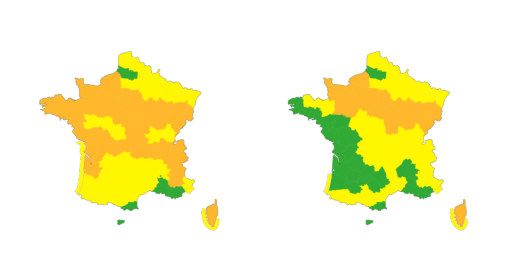

In [13]:
client.get_vignette()